In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt


(array([ 31445.,  58124.,  48894.,  86904.,  65801., 104854.,  74198.,
        115811.,  77842., 118049., 122561.,  81932., 123210.,  81604.,
        122664.,  80664., 118194.,  76401., 110255.,  71011., 102890.,
         99545.,  64615.,  94705.,  63975.,  95894.,  63961.,  99427.,
         67324., 105223., 108576.,  75484., 114978.,  80202., 123246.,
         84850., 130202.,  89855., 139125.,  97365., 152189., 156772.,
        110112., 169612., 117257., 182506., 125874., 194742., 134653.,
        205822., 211997., 145274., 220868., 151155., 227873., 152944.,
        231931., 153767., 233147., 154923., 228924., 231123., 153681.,
        224998., 148370., 220475., 145863., 211328., 139907., 204595.,
        199483., 129182., 191851., 123798., 182365., 119926., 174206.,
        113377., 167958., 108792., 161300., 156618., 102322., 150021.,
         99027., 145230.,  94341., 138884.,  89698., 129286., 124759.,
         80827., 113733.,  71638., 101427.,  64352.,  88072.,  53815.,
      

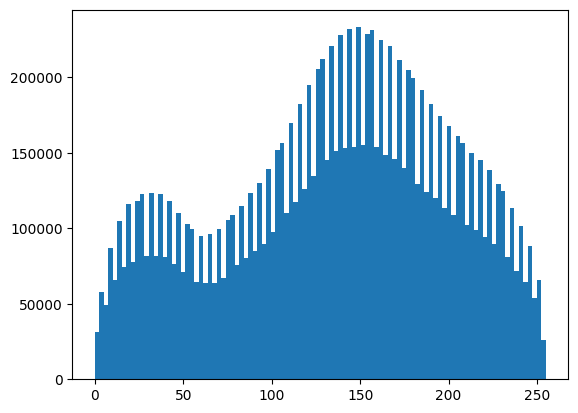

In [15]:
# read the image in grayscale form
img_gray = cv2.imread("data/alexey's_data/IMG_20250416_121855.jpg", 0)

# denoise the image
denoise_img = cv2.GaussianBlur(img_gray, (5,5), 0)

# apply histogram equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl_img = clahe.apply(denoise_img)

# plot the histogram
plt.hist(cl_img.flat, bins=100, range=(0, 255))


In [16]:
# plt.hist(img_gray.flat, bins=100, range=(0, 255))

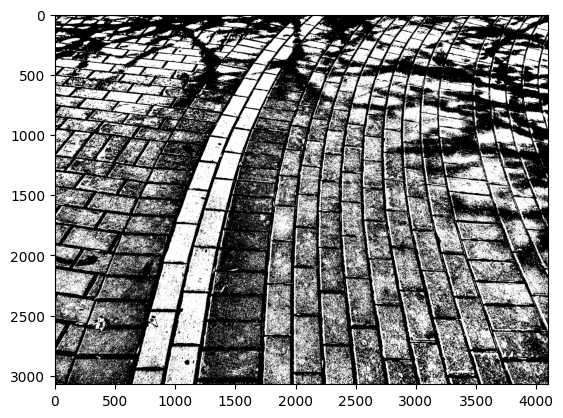

In [17]:
# image thresholding
ret, thresh_1 = cv2.threshold(cl_img, 150, 255, cv2.THRESH_BINARY)
ret, thresh_2 = cv2.threshold(cl_img, 210, 255, cv2.THRESH_BINARY)

plt.imshow(thresh_1, cmap="gray")

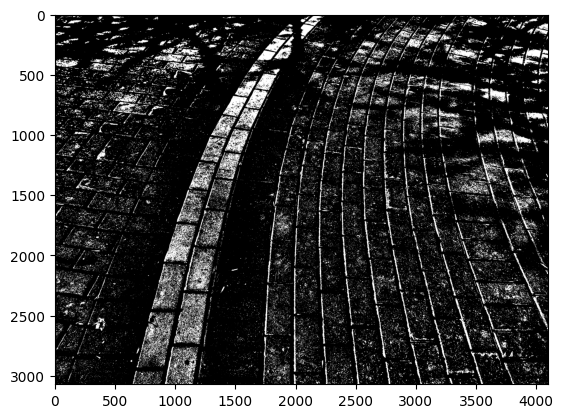

In [18]:
plt.imshow(thresh_2, cmap="gray")

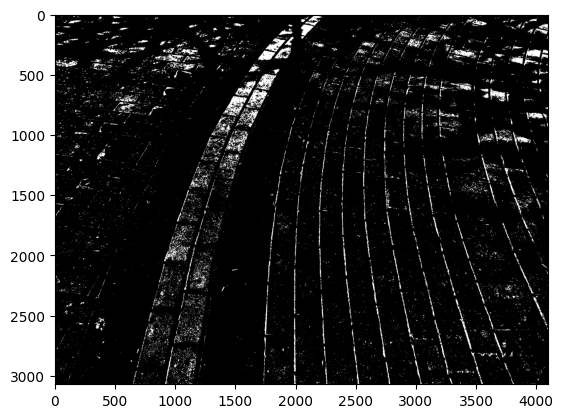

In [24]:
# try to denoise the thresholded image
kernel = np.ones((3,3), np.uint8)
eroded_img = cv2.erode(thresh_2, kernel, iterations=1)
plt.imshow(eroded_img, cmap="gray")

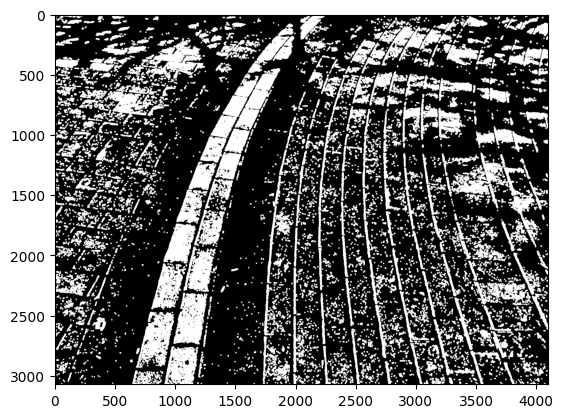

In [26]:
dilated_img = cv2.dilate(eroded_img, kernel, iterations=5)
plt.imshow(dilated_img, cmap="gray")

In [21]:
# # let's try the otsu thresholding
# ret2, thresh_3 = cv2.threshold(cl_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plt.imshow(thresh_3, cmap="gray")

In [1]:
# # Load your thresholded image
# img_gray = cv2.imread('thresholded_image.png', cv2.IMREAD_GRAYSCALE)

# 1. Initial Cleaning with Morphology
kernel = np.ones((5,5), np.uint8)
closed = cv2.morphologyEx(thresh_2, cv2.MORPH_CLOSE, kernel, iterations=2)

# 2. ROI Isolation
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(closed)
largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA]) 
roi_mask = (labels == largest_label).astype(np.uint8) * 255

# 3. Selective Morphological Processing
# Dilate ONLY within the ROI
roi_dilated = cv2.dilate(roi_mask, kernel, iterations=3)

# Create inverse mask for non-ROI areas
non_roi_mask = 255 - roi_mask

# CORRECTED: Use bitwise AND instead of logical AND
non_roi_cleaned = cv2.erode(cv2.bitwise_and(img_gray, non_roi_mask), 
                   np.ones((7,7), np.uint8), 
                   iterations=3)

# CORRECTED: Use bitwise OR instead of logical OR
final_result = cv2.bitwise_or(roi_dilated, non_roi_cleaned)

# 5. Post-processing
final_result = cv2.morphologyEx(final_result, cv2.MORPH_CLOSE, np.ones((3,3), np.uint8))

# 6. Save/Display
cv2.imwrite('clean_line_output.png', final_result)
plt.imshow(final_result, cmap="gray")

NameError: name 'np' is not defined